In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Customer Churn.csv to Customer Churn.csv


In [3]:
data = pd.read_csv("Customer Churn.csv")
print(data.head().to_markdown())

|    |   CustomerID |   Churn |   Tenure | PreferredLoginDevice   |   CityTier |   WarehouseToHome | PreferredPaymentMode   | Gender   |   HourSpendOnApp |   NumberOfDeviceRegistered | PreferedOrderCat   |   SatisfactionScore | MaritalStatus   |   NumberOfAddress |   Complain |   OrderAmountHikeFromlastYear |   CouponUsed |   OrderCount |   DaySinceLastOrder |   CashbackAmount |
|---:|-------------:|--------:|---------:|:-----------------------|-----------:|------------------:|:-----------------------|:---------|-----------------:|---------------------------:|:-------------------|--------------------:|:----------------|------------------:|-----------:|------------------------------:|-------------:|-------------:|--------------------:|-----------------:|
|  0 |        50001 |       1 |        4 | Mobile Phone           |          3 |                 6 | Debit Card             | Female   |                3 |                          3 | Laptop & Accessory |                   2 | Single  

##EDA

In [4]:
print(data.shape)
print(data.columns)

(5630, 20)
Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
# Checking unique values in the data set
data.apply(lambda x: len(x.unique()))

CustomerID                     5630
Churn                             2
Tenure                           37
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  35
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    7
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      17
CouponUsed                       18
OrderCount                       17
DaySinceLastOrder                23
CashbackAmount                  220
dtype: int64

In [7]:
# Checking Null Values
data.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

## Filling the missing values for all column

In [8]:
print(data["Tenure"].fillna(data["Tenure"].median(), inplace=True))
print(data["WarehouseToHome"].fillna(data["WarehouseToHome"].median(), inplace=True))
print(data["HourSpendOnApp"].fillna(data["HourSpendOnApp"].median(), inplace=True))
print(data["OrderAmountHikeFromlastYear"].fillna(data["OrderAmountHikeFromlastYear"].median(), inplace=True))
print(data["CouponUsed"].fillna(data["CouponUsed"].median(), inplace=True))
print(data["OrderCount"].fillna(data["OrderCount"].median(), inplace=True))
print(data["DaySinceLastOrder"].fillna(data["DaySinceLastOrder"].median(), inplace=True))

None
None
None
None
None
None
None


In [9]:
data.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [10]:
# Checking duplicate values
data.duplicated().sum()

0

In [11]:
# Droping Customer ID column
data.drop(columns=["CustomerID"], inplace=True)
data.head(3)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120


In [12]:
data["PreferredPaymentMode"].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

In [13]:
# Replace 'COD' with 'cash on delivery' and "CC" with "Credit Card"
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace('CC', 'Credit Card')
data["PreferredPaymentMode"].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64

In [14]:
data["MaritalStatus"].value_counts()

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64

In [15]:
# Replace 'Divorced' with 'Single'
data['MaritalStatus'] = data['MaritalStatus'].replace('Divorced', 'Single')
data["MaritalStatus"].value_counts()

MaritalStatus
Married    2986
Single     2644
Name: count, dtype: int64

In [16]:
data["PreferedOrderCat"].value_counts()

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

In [17]:
# Replace 'Mobile Phone' with 'Mobile'
data['PreferedOrderCat'] = data['PreferedOrderCat'].replace('Mobile Phone', 'Mobile')
data["PreferedOrderCat"].value_counts()

PreferedOrderCat
Mobile                2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64

In [18]:
data["PreferredLoginDevice"].value_counts()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

In [19]:
# Replace 'Mobile Phone' with 'Mobile'
data['PreferredLoginDevice'] = data['PreferredLoginDevice'].replace('Mobile Phone', 'Phone')
data["PreferredLoginDevice"].value_counts()

PreferredLoginDevice
Phone       3996
Computer    1634
Name: count, dtype: int64

## Statistical Analysis

In [20]:
data.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,0.168384,10.134103,1.654707,15.566785,2.934636,3.688988,3.066785,4.214032,0.284902,15.674600,1.716874,2.961812,4.459325,177.221492
std,0.374240,8.357951,0.915389,8.345961,0.705528,1.023999,1.380194,2.583586,0.451408,3.591058,1.857640,2.879248,3.570626,49.193869
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [21]:
num = data.select_dtypes(include=["int","float"])
num = pd.DataFrame(num)
num.corr()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.337831,0.084703,0.069544,0.018816,0.107939,0.105481,0.043931,0.250188,-0.007075,-0.001430,-0.024038,-0.155871,-0.154161
Tenure,-0.337831,1.000000,-0.057895,-0.012191,-0.017282,-0.020657,-0.014452,0.235076,-0.020535,-0.005542,0.101535,0.165339,0.174378,0.468178
CityTier,0.084703,-0.057895,1.000000,0.013576,-0.009921,0.027934,-0.011554,-0.029440,0.003375,-0.028890,0.022629,0.033551,0.010214,0.055698
WarehouseToHome,0.069544,-0.012191,0.013576,1.000000,0.064069,0.023020,0.007524,-0.008305,0.026825,0.038311,0.002675,0.000354,0.020253,0.000090
HourSpendOnApp,0.018816,-0.017282,-0.009921,0.064069,1.000000,0.305048,0.030937,0.139541,0.006607,0.099305,0.187166,0.102053,0.061213,0.114268
NumberOfDeviceRegistered,0.107939,-0.020657,0.027934,0.023020,0.305048,1.000000,-0.017228,0.084997,0.003407,0.065714,0.152065,0.099790,0.007350,0.137396
SatisfactionScore,0.105481,-0.014452,-0.011554,0.007524,0.030937,-0.017228,1.000000,0.053583,-0.031115,-0.027121,0.017423,0.018166,0.031985,0.003429
NumberOfAddress,0.043931,0.235076,-0.029440,-0.008305,0.139541,0.084997,0.053583,1.000000,-0.026399,0.012161,0.036985,-0.013970,-0.067180,0.186802
Complain,0.250188,-0.020535,0.003375,0.026825,0.006607,0.003407,-0.031115,-0.026399,1.000000,-0.003842,-0.007810,-0.021288,-0.041415,0.000598
OrderAmountHikeFromlastYear,-0.007075,-0.005542,-0.028890,0.038311,0.099305,0.065714,-0.027121,0.012161,-0.003842,1.000000,0.024482,0.010567,-0.004621,-0.009541


## Data Visualization

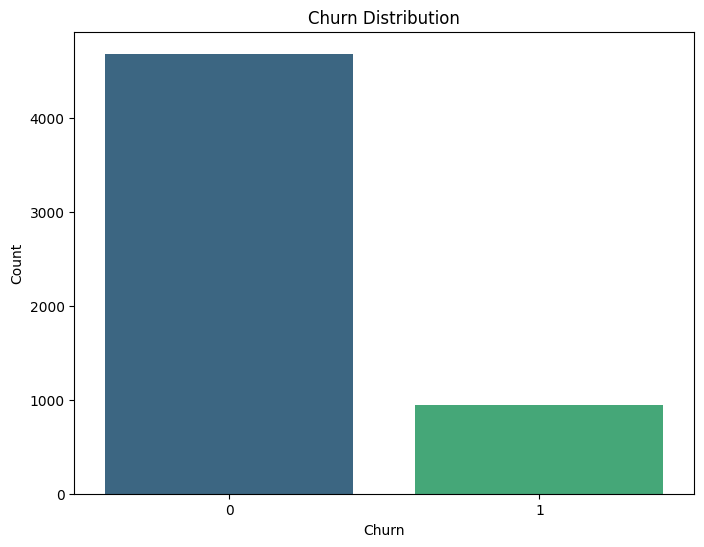

In [22]:
# Plot the distribution of the churn variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Churn', palette='viridis')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

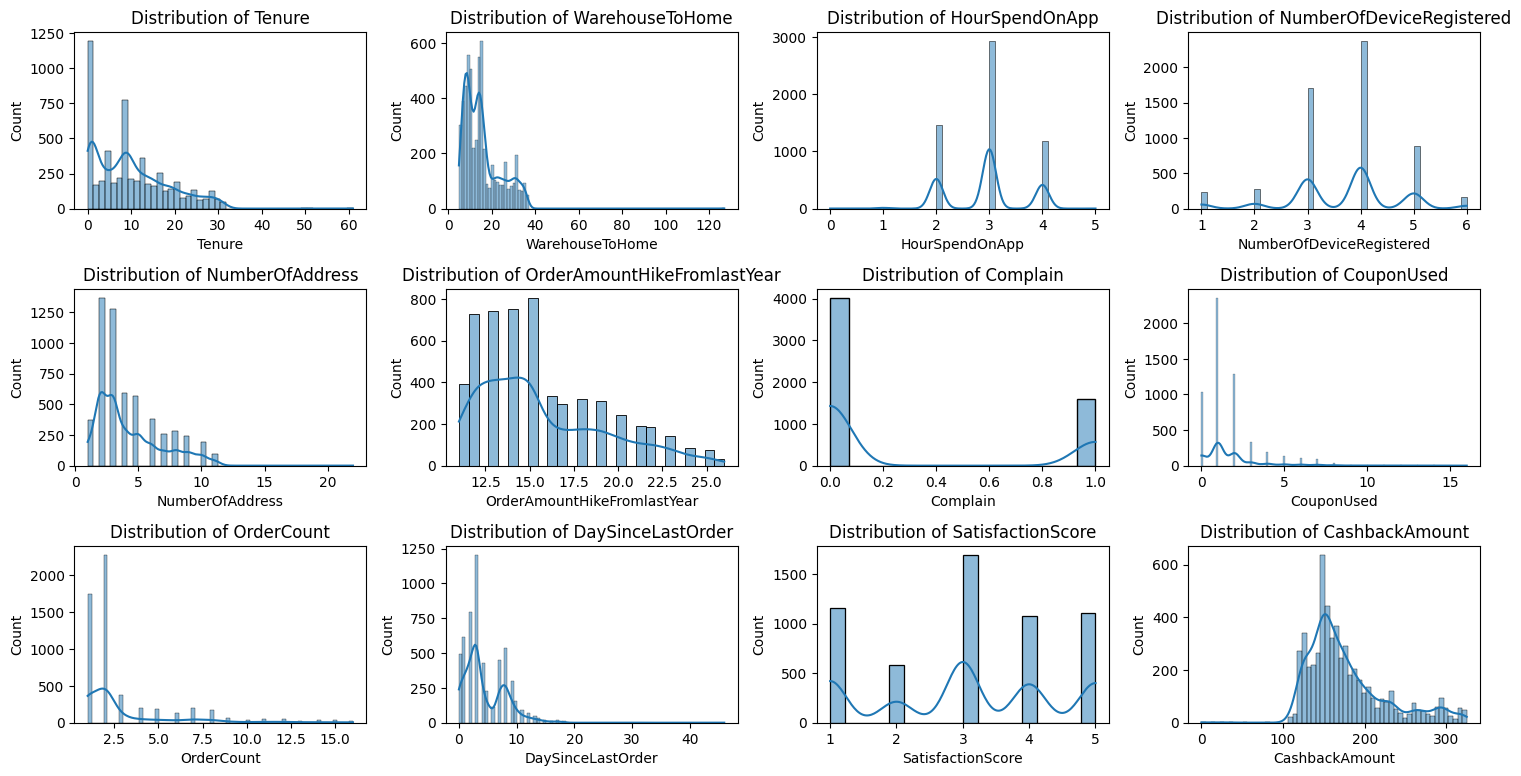

In [23]:
# Histograms of numerical features
numerical_features = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered','NumberOfAddress','OrderAmountHikeFromlastYear', 'Complain',
                      'CouponUsed', 'OrderCount', 'DaySinceLastOrder','SatisfactionScore','CashbackAmount']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

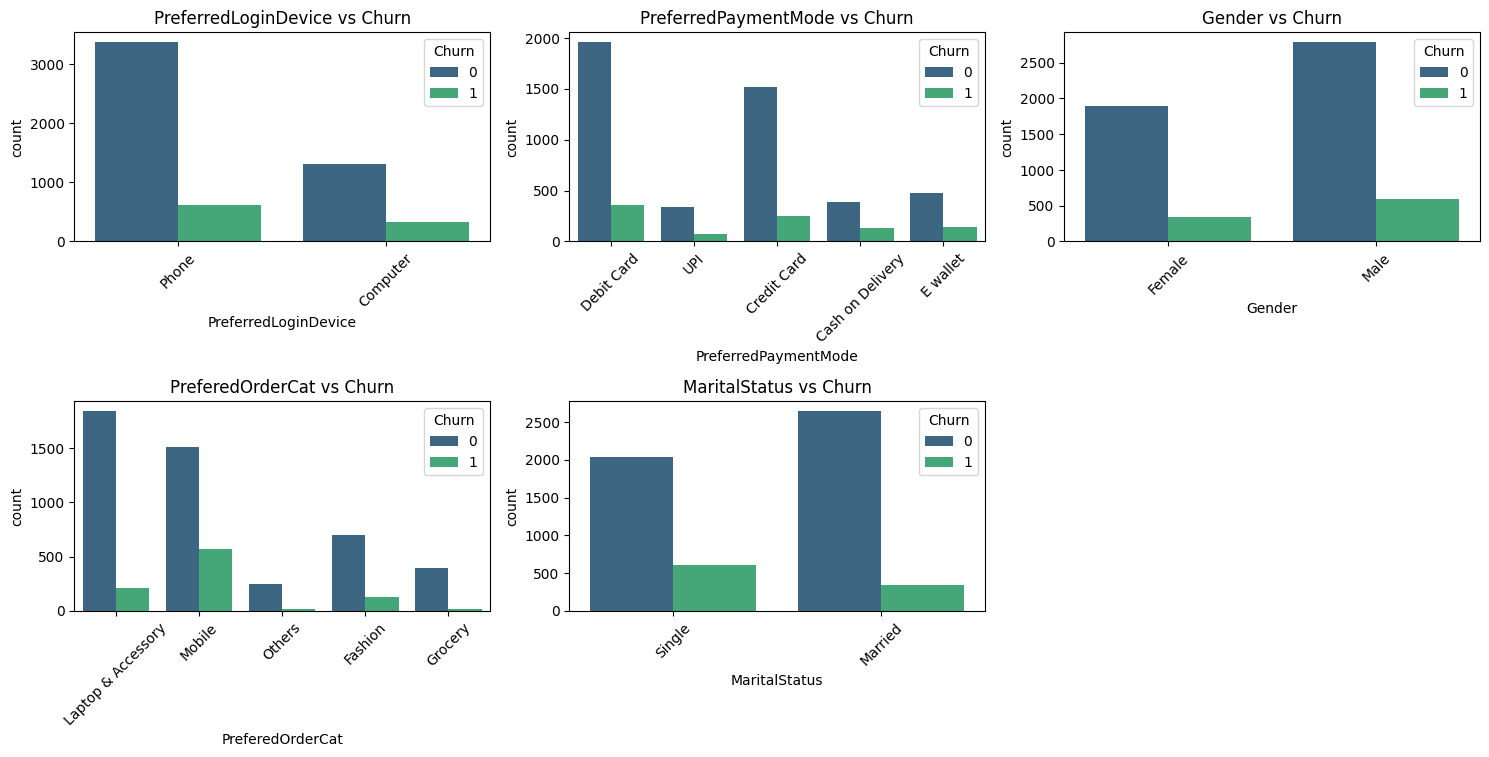

In [24]:
# Count plots of categorical features
categorical_features = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
                        'PreferedOrderCat', 'MaritalStatus']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=data, x=feature, hue='Churn', palette='viridis')
    plt.title(f'{feature} vs Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

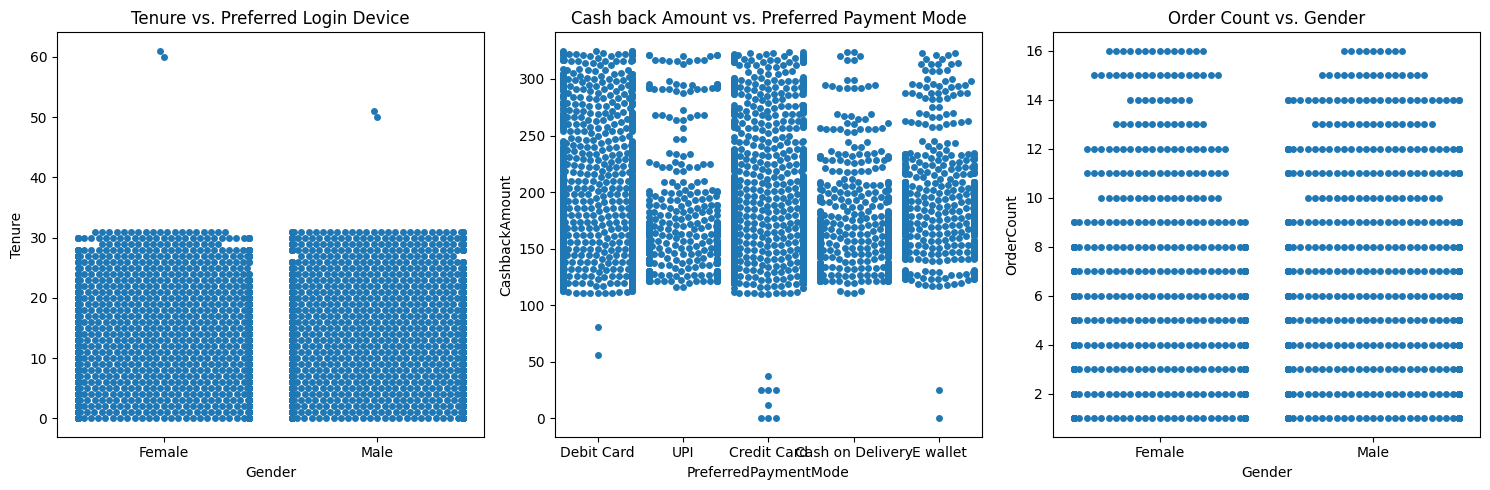

In [25]:
# Tenure vs. Gender
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.swarmplot(x='Gender', y='Tenure', data=data)
plt.title('Tenure vs. Preferred Login Device')

# Cash back Amount vs. Preferred Payment Mode
plt.subplot(1, 3, 2)
sns.swarmplot(x='PreferredPaymentMode', y='CashbackAmount', data=data)
plt.title('Cash back Amount vs. Preferred Payment Mode')

# Order Count vs. Gender
plt.subplot(1, 3, 3)
sns.swarmplot(x='Gender', y='OrderCount', data=data)
plt.title('Order Count vs. Gender')

plt.tight_layout()
plt.show()

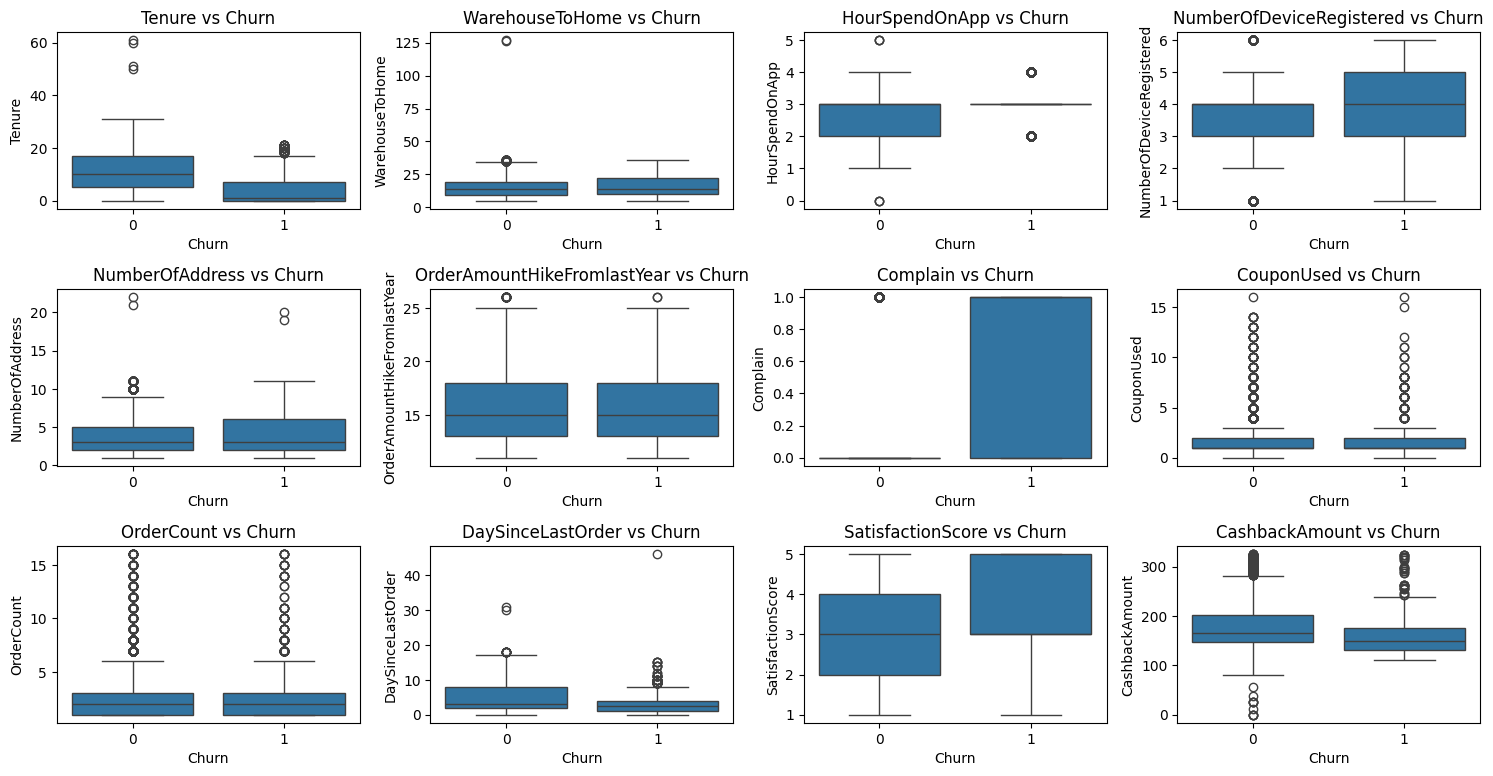

In [26]:
# Box plots to see the relationship between numerical features and churn
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data=data, x='Churn', y=feature)
    plt.title(f'{feature} vs Churn')
plt.tight_layout()
plt.show()

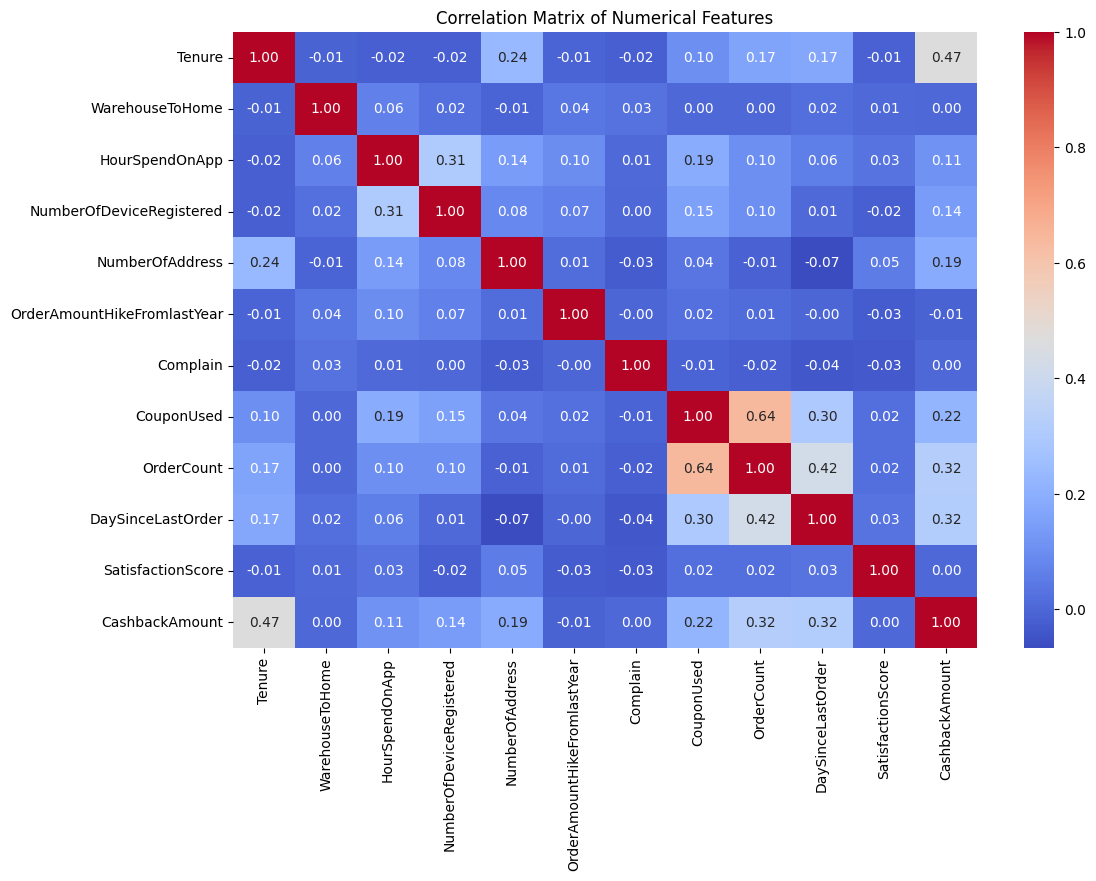

In [27]:
# Correlation matrix of numerical features
corr_matrix = data[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Feature Engineering

In [28]:
# Create new features for segmentation
data['ActivityLevel'] = data['HourSpendOnApp'] / data['Tenure'].replace(0, 1e-10) # Replace 0 with a small number to avoid division by zero
data['CouponUsageRate'] = data['CouponUsed'] / data['OrderCount'].replace(0, 1e-10)
data['ComplaintRate'] = data['Complain'] / data['OrderCount'].replace(0, 1e-10)

# Select relevant features for clustering
features = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed',
            'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'ActivityLevel','CouponUsageRate','ComplaintRate']

# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

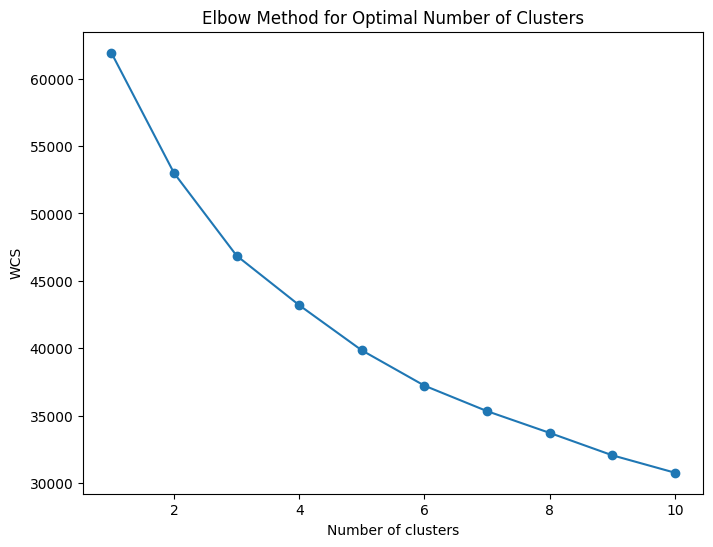

In [29]:
# Apply K-means clustering
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
WCS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    WCS.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), WCS, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

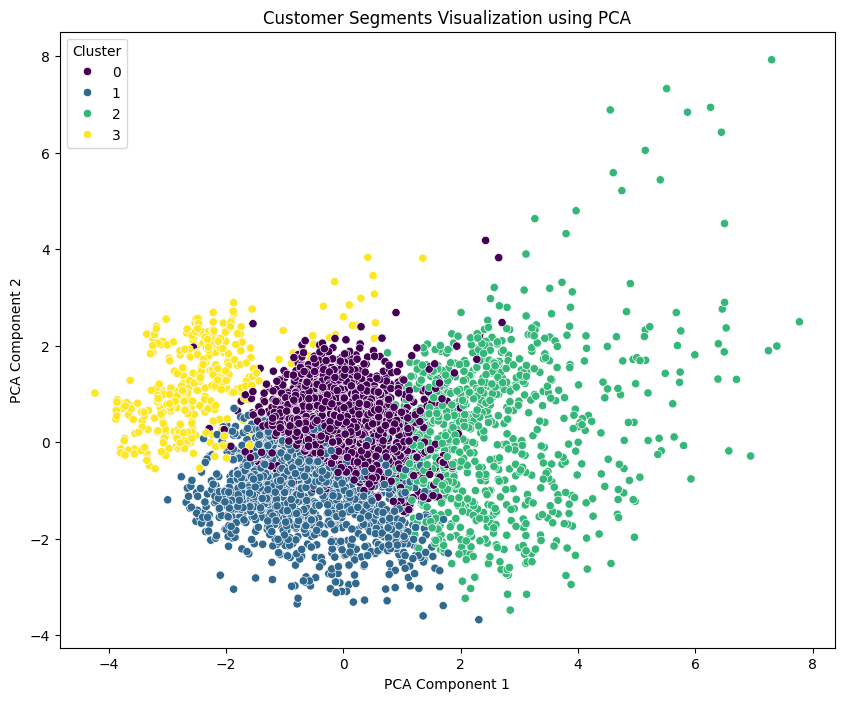

In [30]:
# Apply K-means with the chosen number of clusters
optimal_clusters = 4 # Taking 4 is optimal based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=data['Cluster'], palette='viridis')
plt.title('Customer Segments Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [31]:
# Analyze the characteristics of each cluster
cluster_summary = data.groupby('Cluster')[features].mean()
print(cluster_summary)

            Tenure  WarehouseToHome  HourSpendOnApp  \
Cluster                                               
0         7.568262        16.741135        3.392730   
1        13.631493        14.307818        2.425916   
2        14.428571        15.294343        3.040268   
3         0.000000        15.442231        2.509960   

         OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
Cluster                                                        
0                          16.690603    1.575798    2.188387   
1                          14.660470    0.710224    1.696009   
2                          15.397891    4.183126    7.425695   
3                          15.378486    0.894422    1.774900   

         DaySinceLastOrder  CashbackAmount  ActivityLevel  CouponUsageRate  \
Cluster                                                                      
0                 3.718085      169.725621   1.274900e+00         0.759409   
1                 3.571897      172.469656   3.162

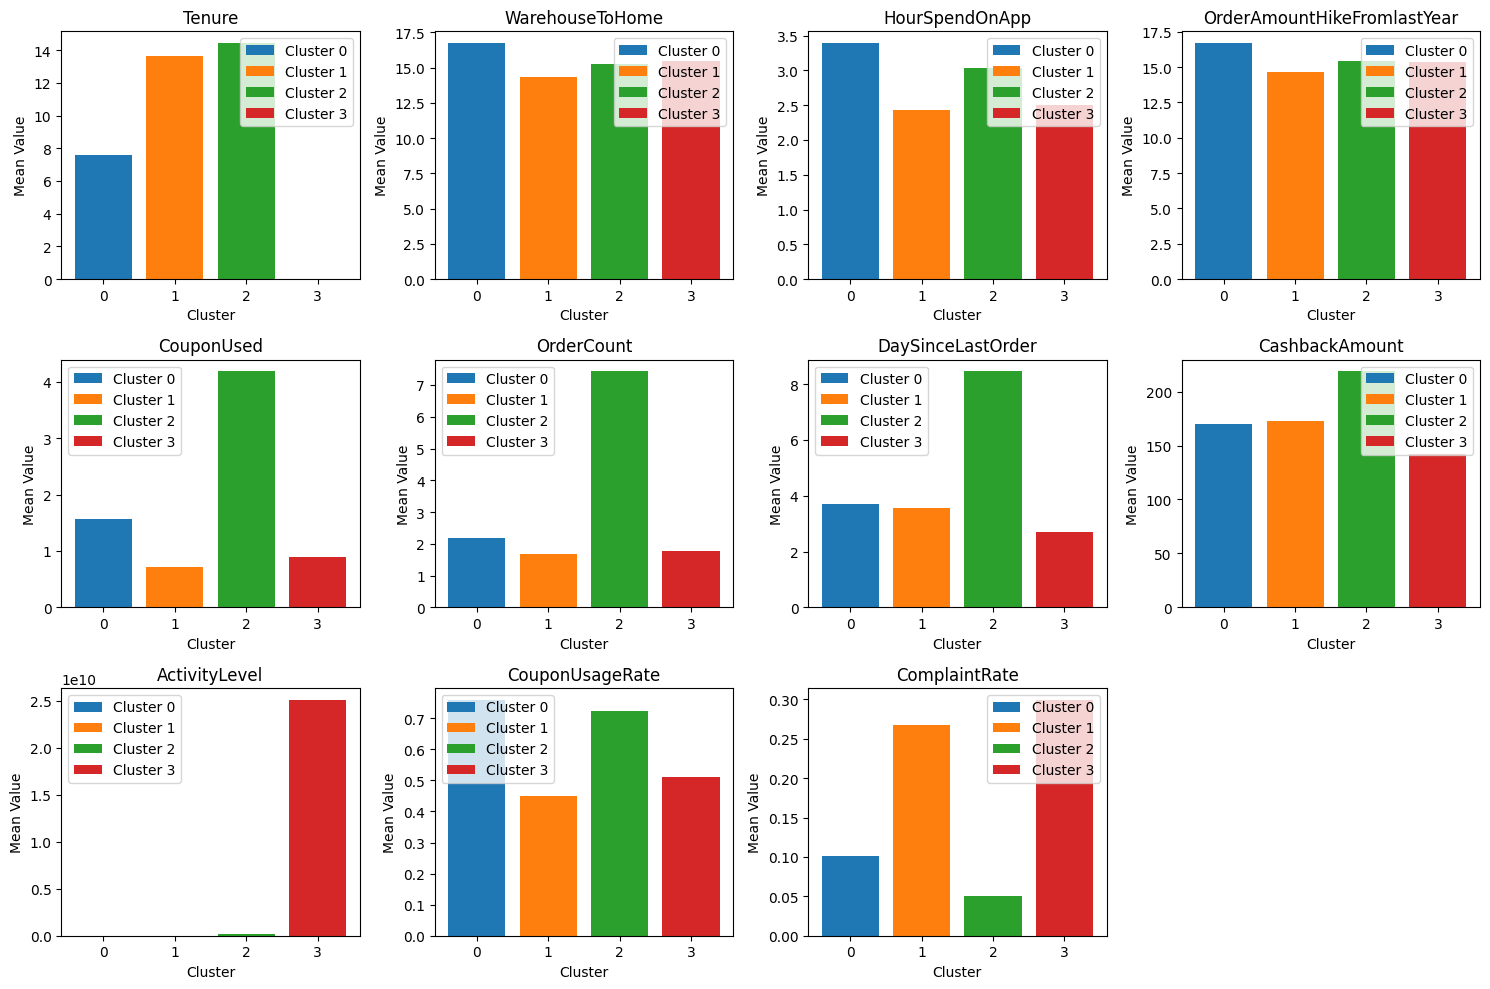

In [32]:
# Plotting characteristics of each cluster
plt.figure(figsize=(15, 10))

# Loop through each feature
for i, feature in enumerate(features):
    plt.subplot(3, 4, i+1)
    for cluster, values in cluster_summary.iterrows():
        plt.bar(cluster, values[feature], label=f'Cluster {cluster}')
    plt.title(feature)
    plt.xlabel('Cluster')
    plt.ylabel('Mean Value')
    plt.legend()

plt.tight_layout()
plt.show()

In [33]:
print(data.head().to_markdown())

|    |   Churn |   Tenure | PreferredLoginDevice   |   CityTier |   WarehouseToHome | PreferredPaymentMode   | Gender   |   HourSpendOnApp |   NumberOfDeviceRegistered | PreferedOrderCat   |   SatisfactionScore | MaritalStatus   |   NumberOfAddress |   Complain |   OrderAmountHikeFromlastYear |   CouponUsed |   OrderCount |   DaySinceLastOrder |   CashbackAmount |   ActivityLevel |   CouponUsageRate |   ComplaintRate |   Cluster |
|---:|--------:|---------:|:-----------------------|-----------:|------------------:|:-----------------------|:---------|-----------------:|---------------------------:|:-------------------|--------------------:|:----------------|------------------:|-----------:|------------------------------:|-------------:|-------------:|--------------------:|-----------------:|----------------:|------------------:|----------------:|----------:|
|  0 |       1 |        4 | Phone                  |          3 |                 6 | Debit Card             | Female   |         

In [34]:
data.shape

(5630, 23)

## LabelEncoding

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['PreferredLoginDevice'] = le.fit_transform(data['PreferredLoginDevice'])
data['PreferredPaymentMode'] = le.fit_transform(data['PreferredPaymentMode'])
data['Gender'] = le.fit_transform(data['Gender'])
data['PreferedOrderCat'] = le.fit_transform(data['PreferedOrderCat'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
print(data.head().to_markdown())

|    |   Churn |   Tenure |   PreferredLoginDevice |   CityTier |   WarehouseToHome |   PreferredPaymentMode |   Gender |   HourSpendOnApp |   NumberOfDeviceRegistered |   PreferedOrderCat |   SatisfactionScore |   MaritalStatus |   NumberOfAddress |   Complain |   OrderAmountHikeFromlastYear |   CouponUsed |   OrderCount |   DaySinceLastOrder |   CashbackAmount |   ActivityLevel |   CouponUsageRate |   ComplaintRate |   Cluster |
|---:|--------:|---------:|-----------------------:|-----------:|------------------:|-----------------------:|---------:|-----------------:|---------------------------:|-------------------:|--------------------:|----------------:|------------------:|-----------:|------------------------------:|-------------:|-------------:|--------------------:|-----------------:|----------------:|------------------:|----------------:|----------:|
|  0 |       1 |        4 |                      1 |          3 |                 6 |                      2 |        0 |         

### Now we are checking which column is more important and less important in our model building

In [36]:
target = data.corr()["Churn"].abs().sort_values(ascending=False)
target*100

Churn                          100.000000
Tenure                          33.783084
ActivityLevel                   30.228016
Complain                        25.018825
ComplaintRate                   21.191651
DaySinceLastOrder               15.587091
CashbackAmount                  15.416120
MaritalStatus                   15.102398
Cluster                         13.463673
NumberOfDeviceRegistered        10.793855
SatisfactionScore               10.548115
PreferedOrderCat                10.456870
CityTier                         8.470317
WarehouseToHome                  6.954372
PreferredLoginDevice             5.109907
NumberOfAddress                  4.393102
Gender                           2.926357
OrderCount                       2.403753
HourSpendOnApp                   1.881578
OrderAmountHikeFromlastYear      0.707492
PreferredPaymentMode             0.234485
CouponUsageRate                  0.193273
CouponUsed                       0.143011
Name: Churn, dtype: float64

In [37]:
X = data.loc[:,data.columns != 'Churn']
y = data['Churn']

In [38]:
X.shape , y.shape

((5630, 22), (5630,))

In [39]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
scaled_X.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,ActivityLevel,CouponUsageRate,ComplaintRate,Cluster
0,-0.733989,0.63946,1.469771,-1.146379,0.238584,-1.227468,0.092654,-0.67290,-0.088263,-0.772992,...,1.584290,-1.301849,-0.385940,-0.681423,0.151436,-0.350105,-0.308268,0.768132,2.715376,0.038264
1,-0.135704,0.63946,-0.715286,-0.906721,2.213919,0.814685,0.092654,0.30375,0.821847,-0.048392,...,1.584290,-0.187872,-0.924305,-0.681423,-1.249003,-1.142957,-0.308268,-1.306806,2.715376,0.038264
2,-0.135704,0.63946,-0.715286,1.729519,0.238584,0.814685,-1.324850,0.30375,0.821847,-0.048392,...,1.584290,-0.466367,-0.924305,-0.681423,-0.408739,-1.163287,-0.308268,-1.306806,2.715376,0.038264
3,-1.212618,0.63946,1.469771,-0.067917,0.238584,0.814685,-1.324850,0.30375,-0.088263,1.400807,...,-0.631198,2.040082,-0.924305,-0.681423,-0.408739,-0.878673,2.416297,-1.306806,-0.529889,2.099735
4,-1.212618,0.63946,-0.715286,-0.427405,-0.749084,0.814685,0.092654,-0.67290,0.821847,1.400807,...,-0.631198,-1.301849,-0.385940,-0.681423,-0.408739,-0.959991,3.778580,0.768132,-0.529889,2.099735


# **Logistic Regression**

In [40]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_train_pred = model.predict(X_train)
y_train_pred

array([1, 0, 0, ..., 0, 0, 1])

In [43]:
y_test_pred = model.predict(X_test)
y_test_pred

array([1, 0, 0, ..., 0, 0, 0])

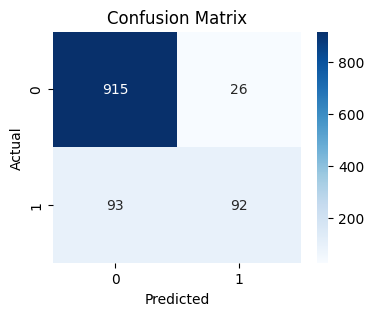

In [44]:
# Confussion matrix for model accuracy for test data
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True,fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [45]:
# Model accuracy on train and test data
from sklearn.metrics import accuracy_score,classification_report
print("training accuracy is :", accuracy_score(y_train, y_train_pred))
print("testing accuracy is :", accuracy_score(y_test, y_test_pred))

training accuracy is : 0.8774422735346359
testing accuracy is : 0.894316163410302


In [46]:
model.predict_proba(X_test)

array([[0.37480661, 0.62519339],
       [0.99438935, 0.00561065],
       [0.88260413, 0.11739587],
       ...,
       [0.9616604 , 0.0383396 ],
       [0.98404936, 0.01595064],
       [0.96813775, 0.03186225]])

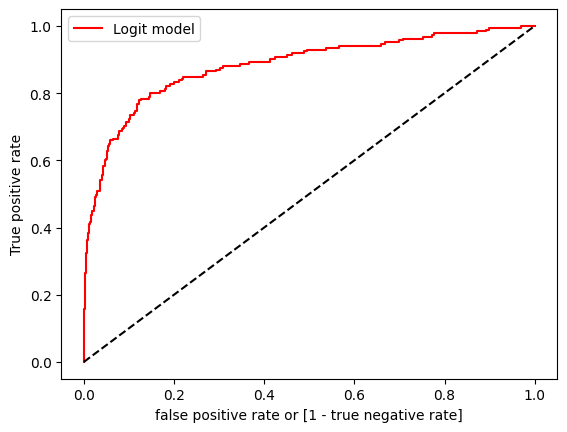

In [47]:
# ROC curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,threesholds = roc_curve(y_test , model.predict_proba (X_test)[:,1])

auc= roc_auc_score(y_test , y_test_pred)

plt.plot( fpr , tpr , color="red", label ="Logit model")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("false positive rate or [1 - true negative rate]")
plt.ylabel("True positive rate")
plt.legend()
plt.show();

In [48]:
# Classification Report
class_report = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n")
print(class_report)


Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       941
           1       0.78      0.50      0.61       185

    accuracy                           0.89      1126
   macro avg       0.84      0.73      0.77      1126
weighted avg       0.89      0.89      0.88      1126



# **SVC**

In [49]:
from sklearn.svm import SVC
svm_classifier = SVC(random_state =42 , probability=True)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [50]:
# Make predictions
svm_train_predictions = svm_classifier.predict(X_train)
svm_test_predictions = svm_classifier.predict(X_test)

In [51]:
# Evaluate the model
accuracy_train_svm = accuracy_score(y_train, svm_train_predictions)
accuracy_test_svm = accuracy_score(y_test, svm_test_predictions)

print("Accuracy On Train Data is :", accuracy_train_svm)
print("Accuracy On Test Data is :", accuracy_test_svm)

Accuracy On Train Data is : 0.9298401420959147
Accuracy On Test Data is : 0.9138543516873889


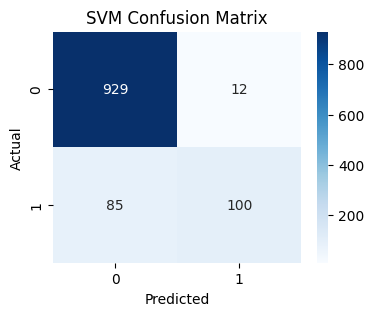

In [52]:
# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, svm_test_predictions)
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

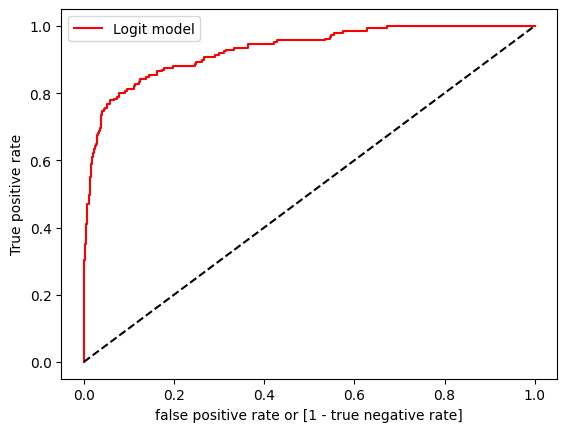

In [53]:
svm_classifier.predict_proba(X_test)
fpr,tpr,threesholds = roc_curve(y_test , svm_classifier.predict_proba (X_test)[:,1])

auc= roc_auc_score(y_test , svm_test_predictions)

plt.plot( fpr , tpr , color="red", label ="Logit model")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("false positive rate or [1 - true negative rate]")
plt.ylabel("True positive rate")
plt.legend()
plt.show();

In [54]:
# Classification report
class_report_svm = classification_report(y_test, svm_test_predictions)
print("\nSVM Classification Report:\n")
print(class_report_svm)


SVM Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       941
           1       0.89      0.54      0.67       185

    accuracy                           0.91      1126
   macro avg       0.90      0.76      0.81      1126
weighted avg       0.91      0.91      0.90      1126



# **Random Forest Classifier**

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import GridSearchCV

rf_classifier = RandomForestClassifier(random_state =42)

# Define the hyper parameter grid for tuning
param_grid = {
     "n_estimators": [100,150,200,250],
     "max_depth": [20,30,40],
     "min_samples_split": [10,15,20],
     "min_samples_leaf": [4,5,6]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

In [56]:
best_params

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 250}

In [57]:
# Train the model with the best parameters
rf_model = RandomForestClassifier(n_estimators = 250 ,max_depth= 20 , min_samples_split =10 ,min_samples_leaf =4 ,random_state= 42 )
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=250, random_state=42)

In [58]:
# Make predictions
rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)

In [59]:
# Evaluate the model
accuracy_train_rf = accuracy_score(y_train, rf_train_predictions)
accuracy_test_rf = accuracy_score(y_test, rf_test_predictions)

print("Accuracy On Train Data is :", accuracy_train_rf)
print("Accuracy On Test Data is :", accuracy_test_rf)

Accuracy On Train Data is : 0.9611456483126111
Accuracy On Test Data is : 0.9351687388987566


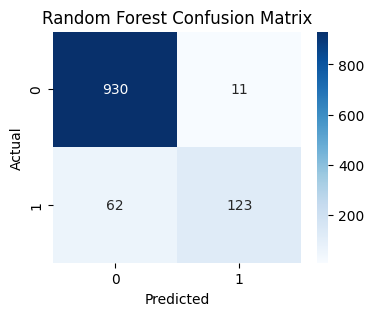

In [60]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, rf_test_predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

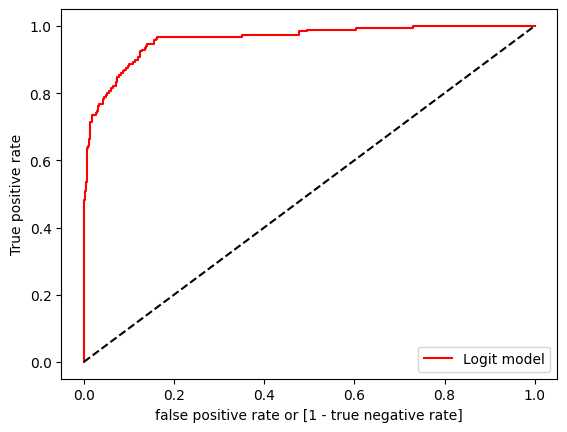

In [61]:
rf_model.predict_proba(X_test)
# ROC curve
fpr,tpr,threesholds = roc_curve(y_test , rf_model.predict_proba (X_test)[:,1])

auc= roc_auc_score(y_test , rf_test_predictions)

plt.plot( fpr , tpr , color="red", label ="Logit model")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("false positive rate or [1 - true negative rate]")
plt.ylabel("True positive rate")
plt.legend()
plt.show();

In [62]:
# Classificaton Report
class_report_rf = classification_report(y_test, rf_test_predictions)
print("\nRandom Forest Classification Report:\n")
print(class_report_rf)


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       941
           1       0.92      0.66      0.77       185

    accuracy                           0.94      1126
   macro avg       0.93      0.83      0.87      1126
weighted avg       0.93      0.94      0.93      1126



# **XG-Boost Classifier**

In [63]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    "n_estimators": [200,300,400,500],
    "max_depth": [3,5,10],
    "learning_rate": [0.001, 0.01],
    "subsample": [0.5,0.7,0.8],
    'gamma':[1,2,3]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

In [64]:
best_params

{'gamma': 1,
 'learning_rate': 0.01,
 'max_depth': 10,
 'n_estimators': 500,
 'subsample': 0.8}

In [65]:
# Train the model with the best parameters
xgb_model = xgb.XGBClassifier( learning_rate = 0.01 , n_estimators = 500 , max_depth= 10 , gamma = 1, subsample = 0.8 ,random_state = 42)
# train the model on training data
xgb_model.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [66]:
# Make predictions
xgb_train_predictions = xgb_model.predict(X_train)
xgb_test_predictions = xgb_model.predict(X_test)

In [67]:
# Evaluate the model
accuracy_train_xgb = accuracy_score(y_train, xgb_train_predictions)
accuracy_test_xgb = accuracy_score(y_test, xgb_test_predictions)

print("Accuracy On Train Data is :", accuracy_train_xgb)
print("Accuracy On Test Data is :", accuracy_test_xgb)

Accuracy On Train Data is : 0.9924511545293073
Accuracy On Test Data is : 0.955595026642984


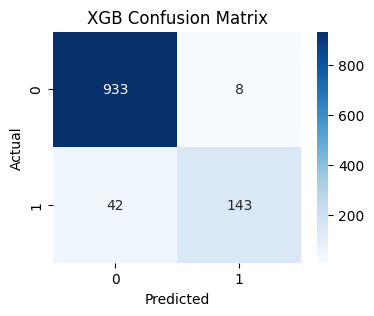

In [68]:
# Confusion Matrix
conf_matrix_XGB = confusion_matrix(y_test, xgb_test_predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_XGB, annot=True, fmt="d", cmap="Blues", xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.title("XGB Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

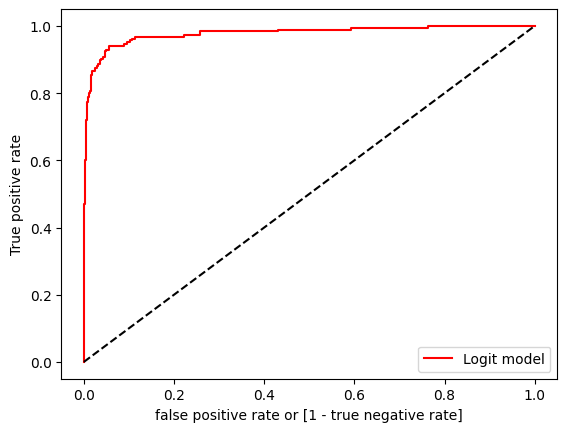

In [69]:
xgb_model.predict_proba(X_test)
# ROC curve
fpr,tpr,threesholds = roc_curve(y_test , xgb_model.predict_proba (X_test)[:,1])

auc= roc_auc_score(y_test , xgb_test_predictions)

plt.plot( fpr , tpr , color="red", label ="Logit model")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("false positive rate or [1 - true negative rate]")
plt.ylabel("True positive rate")
plt.legend()
plt.show();

In [70]:
# Classificaton Report
class_report_xgb = classification_report(y_test, xgb_test_predictions)
print("\nXG-Boost Classification Report:\n")
print(class_report_xgb)


XG-Boost Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       941
           1       0.95      0.77      0.85       185

    accuracy                           0.96      1126
   macro avg       0.95      0.88      0.91      1126
weighted avg       0.96      0.96      0.95      1126

